# Assignment 2. Heart rate detection
Hardware 1 - Orientation to Health Technology<br>
Your name: **Onni Kivinen**<br>
Date returned: **00-00-0000**<br>
Metropolia University of Applied Sciences<br>

## 1. Setup

In [946]:
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

## 2. All data
Data read and plotted

In [947]:
# Reads the file into a numpy array
data = hp.get_data('capture01_250Hz.txt')
# Create a time vector
Fs = 250 # Sampling rate (samples per second)
time = np.arange(len(data))/Fs

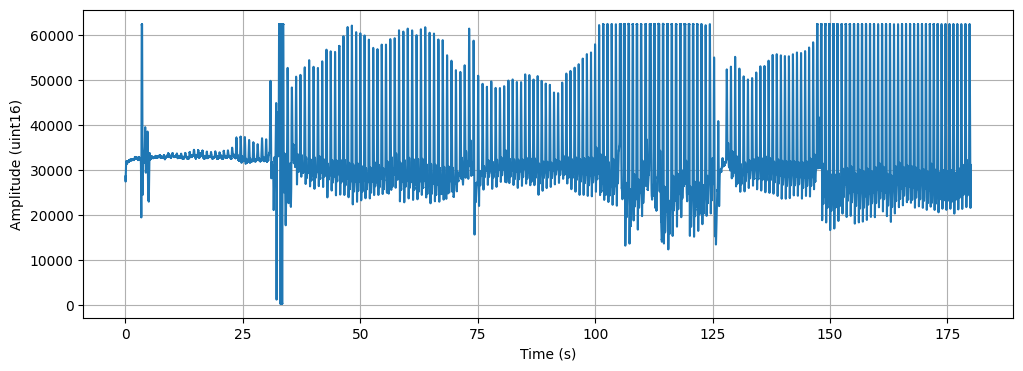

In [948]:
# Plot the whole data in a graphical figure
plt.figure(figsize = (12, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## 3. Selected segment
**60 second** segment from the data and a graph of it.

Segment starts from: 55 s


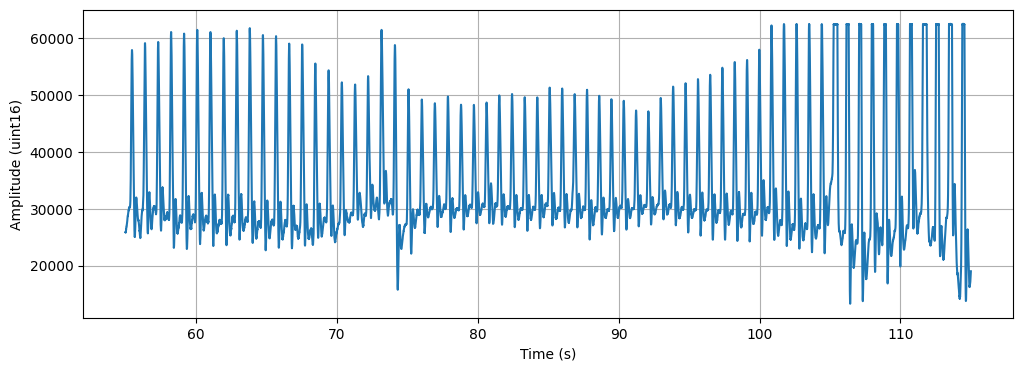

In [949]:
# Random seed based on the last four digits of the student ID number
np.random.seed(306)
t0 = np.random.randint(30, 100)
print(f'Segment starts from: {t0} s')

# Select a segment
i = (t0 < time) & (time < t0 + 60)
data2 = data[i]
time2 = time[i]

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## 4. Peak detection and HRV measurements
Detect the peaks from the selected segment of data, make a graph of the processed data segment to show the peaks, and finally display the measures computed.

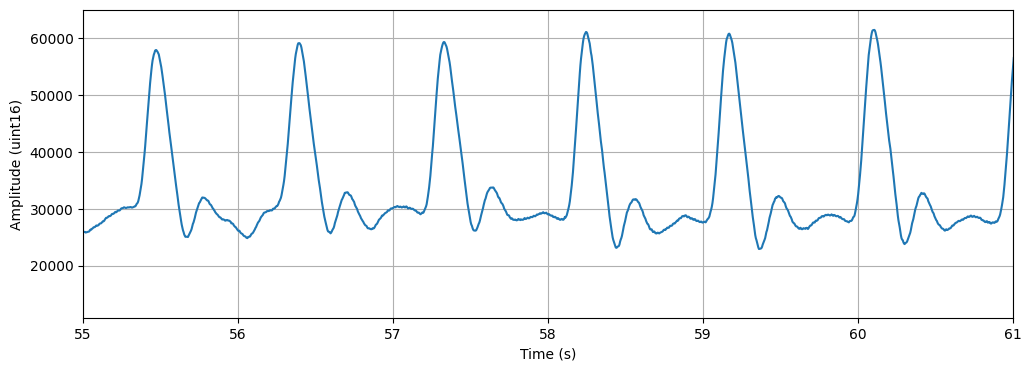

In [950]:
# Zoom in to the first 6 seconds to show the details of the signal

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.xlim(t0, t0 + 6)
plt.show()

<Figure size 1200x400 with 0 Axes>

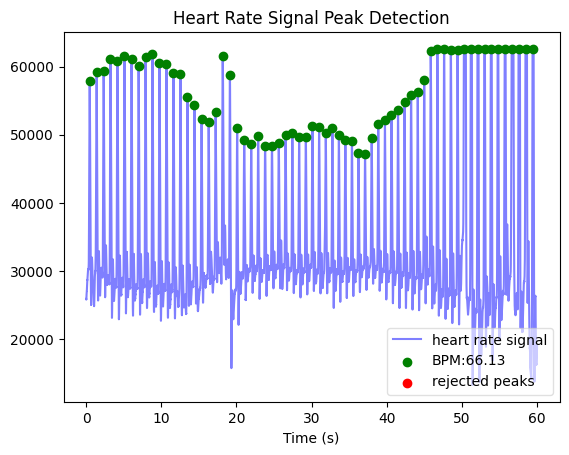

In [951]:
working_data, measures = hp.process(data2, sample_rate=Fs) # <- 250hz
plt.figure(figsize = (12,4))

hp.plotter(working_data, measures)

In [952]:
for measure in measures.keys():
    print('%s: %f' %(measure, measures[measure]))

bpm: 66.133080
ibi: 907.261538
sdnn: 30.486454
sdsd: 21.139049
rmssd: 26.286879
pnn20: 0.218750
pnn50: 0.078125
hr_mad: 28.000000
sd1: 18.582376
sd2: 39.113617
s: 2283.384683
sd1/sd2: 0.475087
breathingrate: 0.233333


## 5. Interpretations
Interpretation of the results:

1. Average heart rate (66 bpm): Normal, on the lower end -> relaxed state or good fitness

2. Average inter-beat interval (IBI: 907 ms): On the lower end of normal, corresponding to a lower heart rate.

3. Heart rate variability (SDNN: 30.49 ms, RMSSD: 26.29 ms): Both values are relatively low, meaning low variability, which means potential stress or impaired recovery

4. Interpretation of stress and recovery: Low heart rate variability suggests moderate stress or poor recovery, even though the heart rate itself is not elevated. The person may be in a resting state, but their autonomic nervous system indicates stress.